In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mdd_df = pd.read_csv(mouse_drug_data_to_load)
ctd_df = pd.read_csv(clinical_trial_data_to_load)

In [2]:
ctd_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mdd_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
data_df = pd.merge(ctd_df, mdd_df)
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
# TRT is Tumor Response to Treatment
TRTmean_df = pd.DataFrame(data_df.groupby(["Drug", "Timepoint"]).mean())
del TRTmean_df['Metastatic Sites']
TRTmean_df.reset_index(inplace=True)
TRTmean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
TRTsem_df = pd.DataFrame(data_df.groupby(["Drug", "Timepoint"]).sem())
del TRTsem_df['Metastatic Sites']
del TRTsem_df['Mouse ID']
TRTsem_df.reset_index(inplace=True)
TRTsem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
TRTmean1_df = TRTmean_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
TRTsem1_df = TRTsem_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
TRTmean1_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


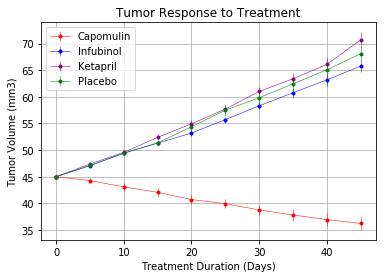

In [8]:
# Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
#To do this you are tasked with:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# DI = Drugs of Interest (ie- only Capomulin, Infubinol, Ketapril, Placebo)
TRTmeanDI_df = TRTmean1_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
TRTsemDI_df = TRTsem1_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

#Generate the Plot (with Error Bars)
tumor_treatment_c = plt.errorbar(TRTmeanDI_df.index,TRTmeanDI_df["Capomulin"],TRTsemDI_df["Capomulin"],fmt='.',ls='-',color='red',linewidth=0.5)
tumor_treatment_i = plt.errorbar(TRTmeanDI_df.index,TRTmeanDI_df["Infubinol"],TRTsemDI_df["Infubinol"],fmt='.',ls='-',color='blue',linewidth=0.5)
tumor_treatment_k = plt.errorbar(TRTmeanDI_df.index,TRTmeanDI_df["Ketapril"],TRTsemDI_df["Ketapril"],fmt='.',ls='-',color='purple',linewidth=0.5)
tumor_treatment_p = plt.errorbar(TRTmeanDI_df.index,TRTmeanDI_df["Placebo"],TRTsemDI_df["Placebo"],fmt='.',ls='-',color='green',linewidth=0.5)

# Create a legend for the chart
plt.legend(loc='best')

# Add labels to X and Y axes :: Add title
plt.title('Tumor Response to Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save the Figure

plt.savefig("Images/tumor_response_scatter_plot.png")
# Show the Figure
plt.grid()
plt.show()

In [9]:
# MRT is Metastatic Response to Treatment
MRTmean_df = pd.DataFrame(data_df.groupby(["Drug", "Timepoint"]).mean())
del MRTmean_df['Tumor Volume (mm3)']
MRTmean_df.reset_index(inplace=True)
MRTmean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
MRTsem_df = pd.DataFrame(data_df.groupby(["Drug", "Timepoint"]).sem())
del MRTsem_df['Tumor Volume (mm3)']
del MRTsem_df['Mouse ID']
MRTsem_df.reset_index(inplace=True)
MRTsem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
MRTmean1_df = MRTmean_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
MRTsem1_df = MRTsem_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
MRTmean1_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


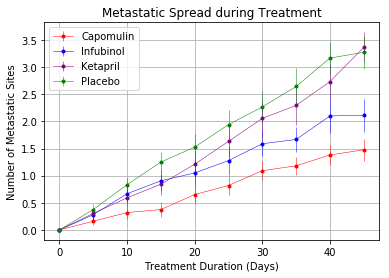

In [12]:
# Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
#Create a scatter plot that shows how the number of metastatic sites changes over time for each treatment.
# Generate the Plot (with Error Bars)
metastatic_sites_c = plt.errorbar(MRTmean1_df.index,MRTmean1_df["Capomulin"],MRTsem1_df["Capomulin"],fmt='.',ls='-',color='red',linewidth=0.5)
metastatic_sites_i = plt.errorbar(MRTmean1_df.index,MRTmean1_df["Infubinol"],MRTsem1_df["Infubinol"],fmt='.',ls='-',color='blue',linewidth=0.5)
metastatic_sites_k = plt.errorbar(MRTmean1_df.index,MRTmean1_df["Ketapril"],MRTsem1_df["Ketapril"],fmt='.',ls='-',color='purple',linewidth=0.5)
metastatic_sites_p = plt.errorbar(MRTmean1_df.index,MRTmean1_df["Placebo"],MRTsem1_df["Placebo"],fmt='.',ls='-',color='green',linewidth=0.5)

# Create a legend for the chart
plt.legend(loc='best')

# Add labels to X and Y axes :: Add title
plt.title('Metastatic Spread during Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Number of Metastatic Sites')

# Save the Figure

plt.savefig("Images/metastasis_scatter_plot.png")
# Show the Figure
plt.grid()
plt.show()

In [13]:
# SR is Survival Rate
SRg = data_df.groupby(["Drug", "Timepoint"])['Mouse ID']
SR_df = pd.DataFrame(SRg.count())
SR_df.reset_index(inplace=True)
SR_df = SR_df.rename(columns={'Mouse ID':'Mouse Count'})
SR_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
SR_clean_df = SR_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
SR_clean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


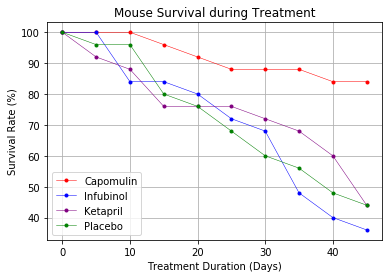

In [15]:
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
# Generate the Plot (Accounting for percentages)

survival_c = plt.plot(SR_clean_df.index,SR_clean_df["Capomulin"]*4,marker='.',ls='-',color='red',linewidth=0.5)
survival_i = plt.plot(SR_clean_df.index,SR_clean_df["Infubinol"]*4,marker='.',ls='-',color='blue',linewidth=0.5)
survival_k = plt.plot(SR_clean_df.index,SR_clean_df["Ketapril"]*4,marker='.',ls='-',color='purple',linewidth=0.5)
survival_p = plt.plot(SR_clean_df.index,SR_clean_df["Placebo"]*4,marker='.',ls='-',color='green',linewidth=0.5)

# Create a legend for the chart
plt.legend(loc='best')

# Add labels to X and Y axes :: Add title
plt.title('Mouse Survival during Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Survival Rate (%)')

# Save the Figure

plt.savefig("Images/mouse_survival_scatter_plot.png")
# Show the Figure
plt.grid()
plt.show()


In [16]:
#Create a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
#Summary Bar Graph
# Calculate the percent changes for each drug
# Display the data to confirm/

Volume_change_df = (TRTmean1_df.iloc[-1]-TRTmean1_df.iloc[0])/(TRTmean1_df.iloc[0])*100

Volume_change_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

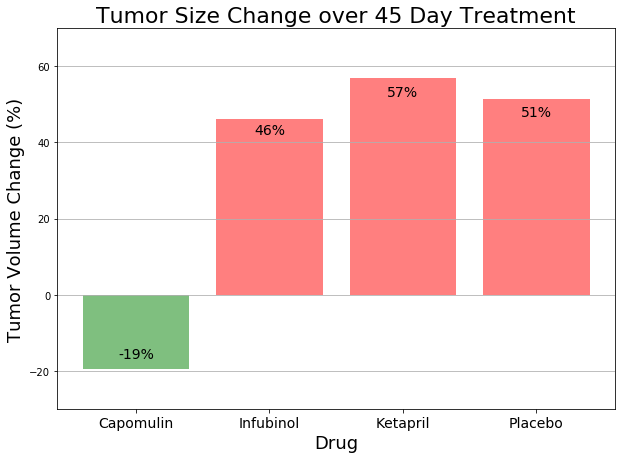

In [17]:
# Store all Relevant Percent Changes into a Tuple
tuple_c = (Volume_change_df.iloc[[0,2,3,5]])
tuple_c

# Splice the data between passing and failing drugs
shrinkingtumor = Volume_change_df < 0

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(tuple_c.index))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,7))
survivalchart = plt.bar(x_axis, tuple_c, color=shrinkingtumor.map({True:'g',False:'r'}), alpha=.5, align="edge")
plt.xticks(tick_locations, tuple_c.index, rotation="horizontal", fontsize = 14)

plt.title("Tumor Size Change over 45 Day Treatment", fontsize = 22)
plt.xlabel("Drug", fontsize = 18)
plt.ylabel("Tumor Volume Change (%)", fontsize = 18)

#yl = (-20, 0, 20, 40, 60)
#plt.hlines(yl, 0, 4, alpha=0.5)
ax = plt.axes()        
ax.yaxis.grid(True)
plt.ylim(-30,70)

# Use functions to label the percentages of changes
def p_label(barchart):
    for bar in barchart:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, .9*height,
                '%d' % int(height) + '%', fontsize = 14,
                ha='center', va='bottom')


# Call functions to implement the function calls
p_label(survivalchart)

# Save the Figure
plt.savefig("Images/tumor_size_change_bar_graph.png")

# Show the Figure
plt.show()

# 3 Observable Trends in the Data
#### Of the four compared treatments (Capomulin, Infubinol, Ketapril, and the placebo), Capomulin was the only one that reduced the tumor size in mice over the 45 day duration of the experiment. 
#### Infubinol had the largest mortality rate, with over 60% of test subjects dying over the 45 day period.
#### Ketapril and the placebo were the least effective in reducing metastatic spread of the tumors in the mice over the length of the experiment, with both treatments resulting in over 3 new metastases on average per mouse.